In [52]:
#imports
import pandas as pd #manipulacao de dataframe
import numpy as np #algebra linear
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline
import seaborn as sns

In [5]:
#abrindo o dataframe
df = pd.read_csv('tabela-certification.csv')
df.drop("Unnamed: 0",axis='columns', inplace=True)
df

,Certificação,Artista(s),Título,Formato,Data de Lançamento,Data de Certificação,Gravadora(s),Unidades Certificadas
0,Multi platinum,NIKO MOON,GOOD TIME,SINGLE,"JULY 19, 2019","November 22, 2021",RCA NASHVILLE,2 Million
1,Multi platinum,BROCKHAMPTON,SUGAR,SINGLE,"AUGUST 23, 2019","November 19, 2021",QUESTION EVERYTHING / RCA RECORDS,2 Million
2,Platinum,HOUNDMOUTH,SEDONA,SINGLE,"JANUARY 20, 2015","November 17, 2021",ROUGH TRADE,1 Million
3,Platinum,CASTING CROWNS,NOBODY (FEAT. MATTHEW WEST),SINGLE,"OCTOBER 12, 2018","November 16, 2021",BEACH STREET RECORDS / REUNION RECORDS,1 Million
4,Platinum,YOUNG M.A,BIG,SINGLE,"JUNE 28, 2019","November 12, 2021",M.A MUSIC / 3D,1 Million
...,...,...,...,...,...,...,...,...
6964,Gold,MONICA,STILL STANDING,ALBUM,"MARCH 23, 2010","April 21, 2010",J RECORDS,0.5 Million
6965,Platinum,LUDACRIS,HOW LOW,SINGLE,"MARCH 9, 2010","April 9, 2010",DEF JAM,1 Million
6966,Platinum,BANDA LOS RECODITOS,ANDO BIEN PEDO,ALBUM,"JANUARY 19, 2010","March 19, 2010",DISA,0.06 Million
6967,Platinum,SADE,SOLDIER OF LOVE,ALBUM,"FEBRUARY 9, 2010","March 15, 2010",COLUMBIA,1 Million


In [8]:
#mais informacoes sobre o dataframe
df.describe()

,Certificação,Artista(s),Título,Formato,Data de Lançamento,Data de Certificação,Gravadora(s),Unidades Certificadas
count,6969,6969,6969,6969,6969,6969,6969,6969
unique,4,1909,6138,7,1758,1577,1048,58
top,Gold,DRAKE,NO LOVE,SINGLE,"AUGUST 25, 2017","June 3, 2021",ATLANTIC RECORDS,0.5 Million
freq,2813,75,5,5714,40,64,462,2496


<ipython-input-94-908dcb5c08dc>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(best_single_artists.index, fontsize=12, fontweight='semibold')
<ipython-input-94-908dcb5c08dc>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(best_album_artists.index, fontsize=12, fontweight='semibold')


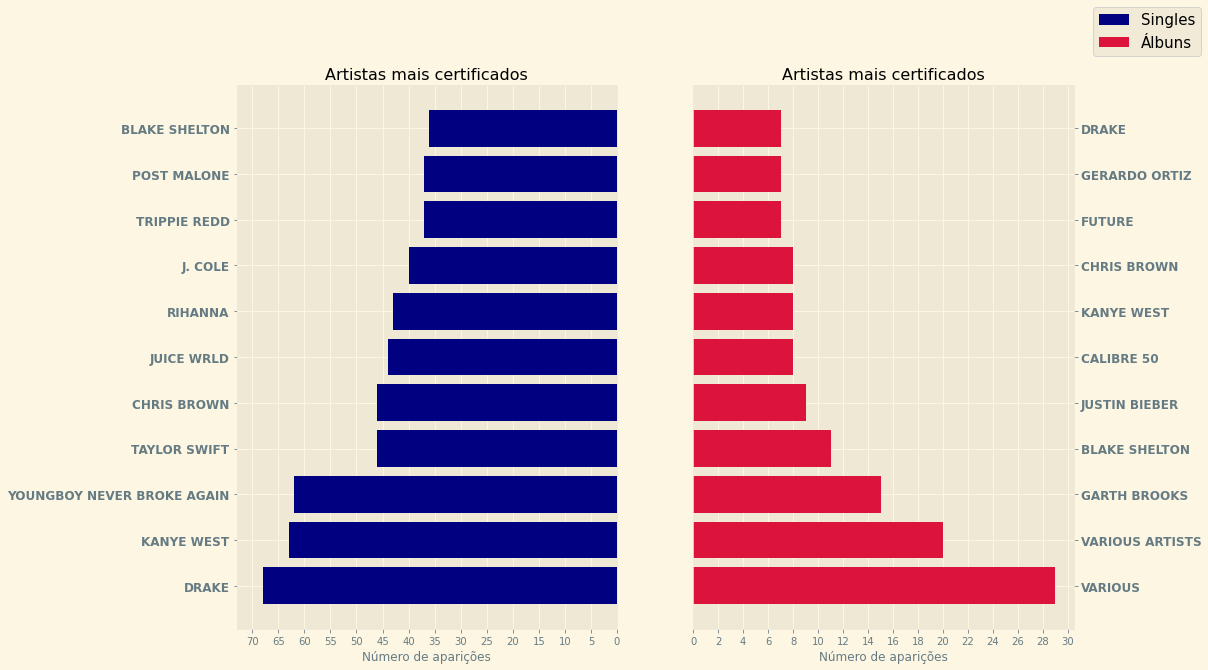

In [94]:
#plotando gráfico de barras dos artistas mais certificados com singles e albuns
best_single_artists = df.groupby(['Artista(s)', 'Formato']).agg({'Título': 'count'}).unstack()['Título', 'SINGLE'].sort_values(ascending=False)[:11]
best_album_artists = df.groupby(['Artista(s)', 'Formato']).agg({'Título': 'count'}).unstack()['Título', 'ALBUM'].sort_values(ascending=False)[:11]
genre_col = ['navy','crimson']

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(15,10))
    loc1 = plticker.MultipleLocator(base=5.0)
    loc2 = plticker.MultipleLocator(base=2.0)
    ax[0].barh(y=best_single_artists.index, width=best_single_artists.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_album_artists.values)+45))
    ax[0].set_yticklabels(best_single_artists.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Número de aparições')
    ax[0].xaxis.set_major_locator(loc1)
    ax[0].set_title('Artistas mais certificados')
    
    ax[1].barh(y=best_album_artists.index, width=best_album_artists.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_album_artists.values)+1))
    ax[1].set_yticklabels(best_album_artists.index, fontsize=12, fontweight='semibold')
    ax[1].xaxis.set_major_locator(loc2)
    ax[1].set_title('Artistas mais certificados')
    ax[1].set_xlabel('Número de aparições')
    fig.legend(['Singles', 'Álbuns'], fontsize=15)

plt.show()

<ipython-input-93-837134bcd217>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(best_single_labels.index, fontsize=12, fontweight='semibold')
<ipython-input-93-837134bcd217>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(best_album_labels.index, fontsize=12, fontweight='semibold')


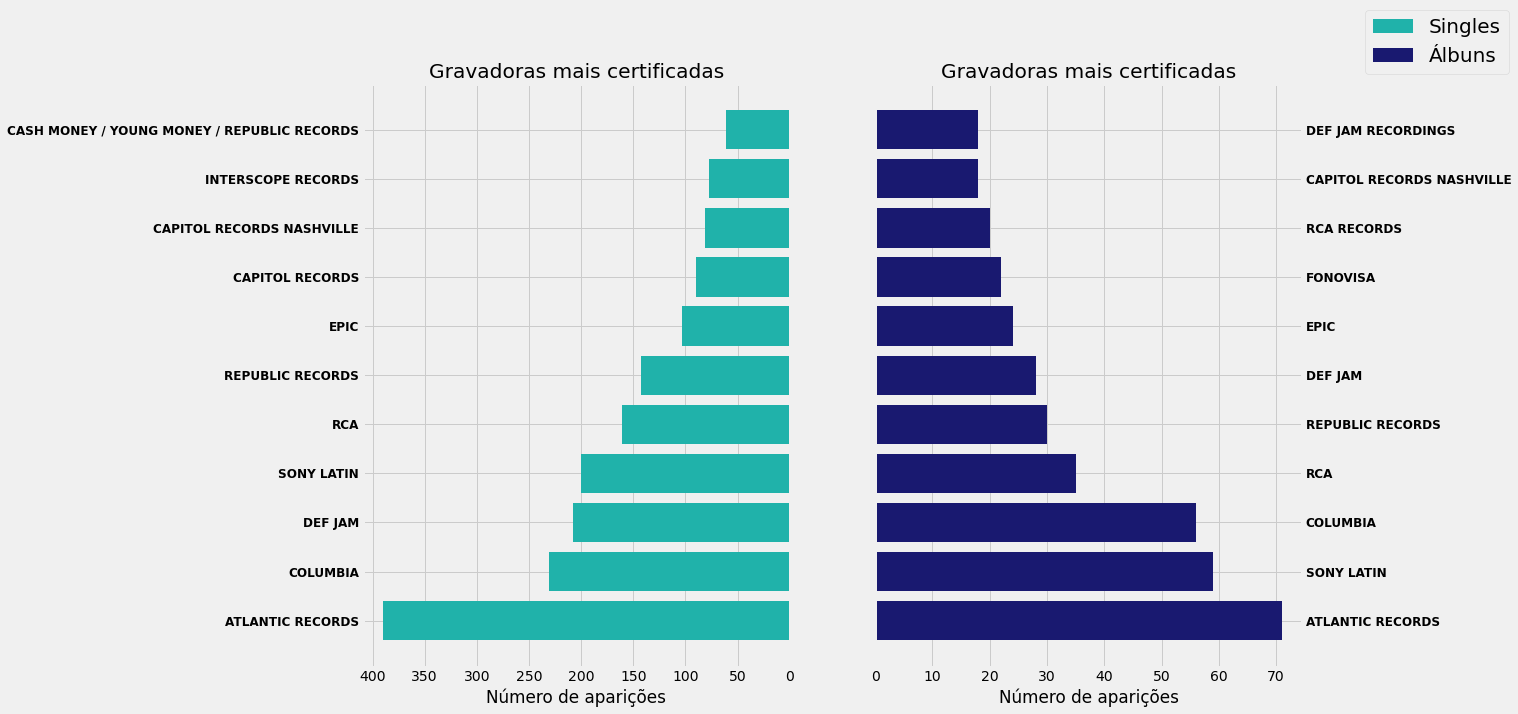

In [93]:
#plotando gráfico de barras das gravadoras mais certificadas com singles e albuns
best_single_labels = df.groupby(['Gravadora(s)', 'Formato']).agg({'Título': 'count'}).unstack()['Título', 'SINGLE'].sort_values(ascending=False)[:11]
best_album_labels = df.groupby(['Gravadora(s)', 'Formato']).agg({'Título': 'count'}).unstack()['Título', 'ALBUM'].sort_values(ascending=False)[:11]
genre_col = ['lightseagreen','midnightblue']

with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 2, figsize=(15,10))
    loc1 = plticker.MultipleLocator(base=50)
    loc2 = plticker.MultipleLocator(base=10)
    ax[0].barh(y=best_single_labels.index, width=best_single_labels.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_album_labels.values)+45))
    ax[0].set_yticklabels(best_single_labels.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Número de aparições')
    ax[0].xaxis.set_major_locator(loc1)
    ax[0].set_title('Gravadoras mais certificadas')
    
    ax[1].barh(y=best_album_labels.index, width=best_album_labels.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_album_labels.values)+1))
    ax[1].set_yticklabels(best_album_labels.index, fontsize=12, fontweight='semibold')
    ax[1].xaxis.set_major_locator(loc2)
    ax[1].set_title('Gravadoras mais certificadas')
    ax[1].set_xlabel('Número de aparições')
    fig.legend(['Singles', 'Álbuns'], fontsize=20)

plt.show()

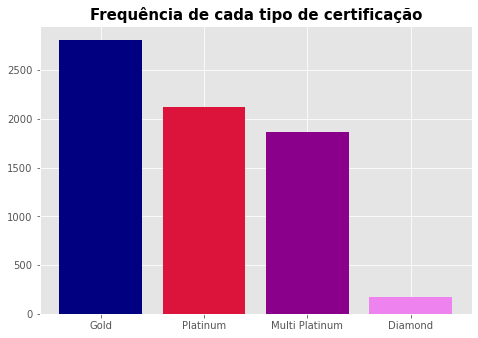

In [92]:
#grafico da frequencia de cada tipo de certificacao
c_count = df['Certificação'].value_counts()

with plt.style.context('ggplot'):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    names = ['Gold', 'Platinum', 'Multi Platinum', 'Diamond']
    values = c_count
    ax.bar(names,values,color = ('navy', 'crimson', 'darkmagenta', 'violet'))
    plt.title("Frequência de cada tipo de certificação", fontsize=15, fontweight='semibold')
plt.show()

